<h3>Particle Swarm Optimisation</h3>

Particle swarm optimisation is a population-based optimisation algorithm inspired by the foraging of flocks of birds in a collaborative methodology. PSO employs an interactive random search for the global optimum based on swarm intelligence. A set of randomly generated potential solutions is generated, and each individual (particle) iteratively improves its position based on its own experience (cognitive learning) and based on the experience of other individuals in the swarm (social learning). The motion of each particle in the search space is thus dictated by a collaborative stochastic search direction:


\begin{eqnarray}
    v_j^{k+1}=\omega^kv_j^{k}+ c_1r_1^k(p_j^k-x_j^k)+c_2r_2^k(g_{(j)}^k-x_j^k)\\
    x_j^{k+1} = x_j^k + v_j^{k+1}
\end{eqnarray}


where $v_j^{k+1}$ is the search direction of a given particle for the next iteration, which is a function of its current velocity $v_j^k$, its best location thus far \textbf{$p_j^k$} (cognitive learning) and the best location $g_{(j)}^k$ (social learning) in the neighbourhood of the particle ($g_j^k$) or within the whole swarm ($g^k$). When $g_{(j)}^k$ represent the best particle location in a given neighbourhood, the algorithm is referred to as local, and it is referred to as global when $g_{(j)}^k$ represent the best candidate in the whole population \cite{bonyadi2017particle}. The latter version is used in the study as our computational experiments suggested better time efficiency in line with the focus of the study. The parameters $c_1$ and $c_2$ represent acceleration parameters for the cognitive and social learning components. $r_1^k,r_2^k\in [0,1]$ are uniform randomly generated numbers that simulate the stochastic behaviour of the swarm.

\begin{equation}
    w^k = w_{max} - \frac{w_{max}-w_{min}}{max\_iter} k
    \label{eq:adapw}
\end{equation}

<img src="media/pso_algo.png"/>

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

class pso:
    def __init__(self,x_l,x_u,c_1=2.0, c_2=2.0,w_max=0.9, w_min=0.4,n_iter=100,pop_size=30, display_on=False):
        self.x_l = x_l
        self.x_u = x_u
        self.n_iter = n_iter #number of iterations of the swarm search
        self.c_1 = c_1 #cognitive component
        self.c_2 = c_2 #social component
        self.pop_size = pop_size #population size
        self.w_max = w_max #maximum inertial weight
        self.w_min = w_min #minimum inertial weight
        self.display_on = display_on #display on (plotting results)
    
    def optimise(self, obj_func):
        return self.build(obj_func)
    
    def get_min(func,Xs):
        n = Xs.shape[1] #number of vectors
        d = Xs.shape[0] #number of dimensions
        
        BUB = np.inf
        g_k = np.zeros((d,1))
        for i in range(n):
            f_i = func(Xs[:,i])
            if f_i < BUB:
                BUB = f_i
                g_k = Xs[:,i]
        return BUB, g_k
    
    def z_func(self,func,x_l,x_u,size):
        x_ = np.linspace(x_l[0], x_u[0], size)
        y_ = np.linspace(x_l[1], x_u[1], size)
        X_, Y_ = np.meshgrid(x_, y_)
        #print(X_.shape)
        Z_ = np.zeros((size,size))
        for i in range(size):
            for j in range(size):
                Z_[i,j] = func(np.array([X_[i,j],Y_[i,j]]))
        return X_,Y_,Z_
        
    def build(self,func):
        x_l = self.x_l
        x_u = self.x_u
        n_iter = self.n_iter
        pop_size = self.pop_size
        w_max = self.w_max
        w_min = self.w_min
        c_1 = self.c_1 #cognitive component
        c_2 = self.c_2 #social component
        display_on = self.display_on#display on
        
        v_max = (x_u-x_l)/2 #maximum velocity
        d = x_u.shape[0] #dimenson of the problem        
        X = np.random.uniform(x_l.reshape(-1,1),x_u.reshape(-1,1),(d,pop_size))#create random initial population
        P = X.copy() #create best particle locations
        V = np.random.uniform(-v_max.reshape(-1,1),v_max.reshape(-1,1),(d,pop_size))#create random initial population
        
        #v = np.random.uniform(-v_max,v_max, (d,1)) #initial velocity
        
        F_p = np.zeros((pop_size,)) #function values
        g_k = np.zeros((d,))
        BUB = np.inf
        
        if display_on:
            plt.figure(1)                        
            X_,Y_,Z_ = self.z_func(func,x_l,x_u,400)
            contour = plt.contour(X_, Y_, Z_, 20, cmap='viridis') 
        #Find function evaluation for the swarm 
        for i in range(pop_size):
            F_p[i] = func(X[:,i])#get function values              
            
            if display_on:
                x_i = X[:,i]
                plt.plot(x_i[0],x_i[1],'b*')
            if F_p[i] < BUB:
                BUB = F_p[i] #best upper bound
                g_k = X[:,i]#global best
        if display_on:
            plt.xlim(x_l[0],x_u[0])
            plt.ylim(x_l[1],x_u[1])
            plt.show()
        
        for k in range(n_iter):#search iterations
            w_k = w_min + k*(w_max-w_min)/n_iter #set inertial weight
            
            if display_on:
                clear_output(wait=True)
                plt.figure(1) 
                X_,Y_,Z_ = self.z_func(func,x_l,x_u,400)
                contour = plt.contour(X_, Y_, Z_, 20, cmap='viridis') 
            for i in range(pop_size):
                r_1 = np.random.uniform(0.0,1.0,(d,))
                r_2 = np.random.uniform(0.0,1.0,(d,))
                #generate search direction
                v_kp = w_k*V[:,i] + c_1*r_1*(P[:,i]-X[:,i]) + c_2*r_2*(g_k-X[:,i])
                
                x_i = X[:,i].copy()
                if display_on:
                    plt.plot(x_i[0],x_i[1],'b*')
                    
                #print(v_kp)
                v_kp = np.minimum(v_kp, v_max)
                v_kp = np.maximum(-v_max,v_kp)  
                
                V[:,i] = v_kp #save velocity
                
                x_kp = X[:,i] + v_kp #move the particle
                x_kp = np.minimum(x_kp,x_u)
                x_kp = np.maximum(x_kp,x_l)                
                X[:,i] = x_kp.copy() #save move
                
                if display_on:
                    plt.plot(x_kp[0],x_kp[1],'b*')
                    plt.plot(np.array([x_i[0],x_kp[0]]),np.array([x_i[1],x_kp[1]]),'r--')                
                    plt.title(f'iteration {k+1} - f_opt: {round(BUB,3)}')
                    
                f_i = func(x_kp)
                if f_i < F_p[i]:
                    F_p[i] = f_i
                    P[:,i] = x_kp #save best experience
                
                if F_p[i] < BUB: #update gbest
                    BUB = F_p[i]
                    g_k = P[:,i]    
                    
            if display_on:
                plt.xlim(x_l[0],x_u[0])
                plt.ylim(x_l[1],x_u[1])
                plt.show()
        return BUB, g_k         
        

In [161]:
def obj_func(x):
    return (x[0]-1.303)**2+(x[1]-0.025)**2

In [195]:
def rosenbrock(v, a=1, b=100):
    """
    Calculate the 2D Rosenbrock function for a given vector.

    Parameters:
    - v: list or array-like, the input vector [x, y].
    - a: float, the parameter a (default is 1).
    - b: float, the parameter b (default is 100).

    Returns:
    - float: the value of the Rosenbrock function at (x, y).
    """
    x, y = v[0], v[1]
    return (a - x)**2 + b * (y - x**2)**2

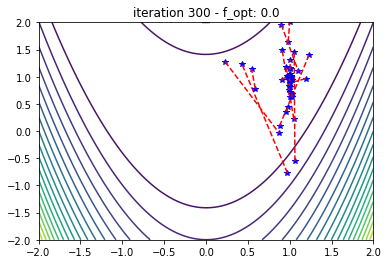

f_opt = 0.0, x_opt = [1. 1.]


In [200]:
import numpy as np

x_l = -2*np.ones((2,))
x_u = 2*np.ones((2,))

PSO = pso(x_l = x_l,x_u=x_u,display_on=True,n_iter=300)
BUB, x_opt = PSO.optimise(rosenbrock)

print(f"f_opt = {np.round(BUB,3)}, x_opt = {np.round(x_opt,3)}")